In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv('zomato_bang.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
#delete column which is not required
zomato = df.drop(['url', 'votes', 'dish_liked', 'phone'], axis =1)
zomato

,address,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [6]:
#removing duplicates
zomato.duplicated().sum()

43

In [7]:
zomato.drop_duplicates(inplace=True)

In [8]:
#remove null values
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
zomato.dropna(how='any', inplace=True)

In [10]:
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [11]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 13 columns):
address                        43499 non-null object
name                           43499 non-null object
online_order                   43499 non-null object
book_table                     43499 non-null object
rate                           43499 non-null object
location                       43499 non-null object
rest_type                      43499 non-null object
cuisines                       43499 non-null object
approx_cost(for two people)    43499 non-null object
reviews_list                   43499 non-null object
menu_item                      43499 non-null object
listed_in(type)                43499 non-null object
listed_in(city)                43499 non-null object
dtypes: object(13)
memory usage: 4.6+ MB


In [12]:
#read column name
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
zomato = zomato.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'})
zomato

,address,name,online_order,book_table,rate,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [14]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [15]:
#change cost to str
zomato['cost']=zomato['cost'].astype(str)

#remove , from cost
zomato['cost']=zomato['cost'].apply(lambda x: x.replace(',', ''))

#change cost to float
zomato['cost']=zomato['cost'].astype(float)

In [16]:
#rating
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
#remove /5 from rate
zomato['rate']=zomato['rate'].apply(lambda x: x.replace('/5', ''))

In [18]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [23]:
#delete rows where rating is NEW and dash
extra = zomato[(zomato['rate'] == 'NEW') | (zomato['rate'] == '-')].index
zomato.drop(extra, inplace = True)
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [24]:
#adjust column name
zomato.name= zomato.name.apply(lambda x: x.title())
zomato.online_order.replace(('Yes', 'No'), (True, False), inplace=True)
zomato.book_table.replace(('Yes', 'No'), (True, False), inplace=True)


In [25]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

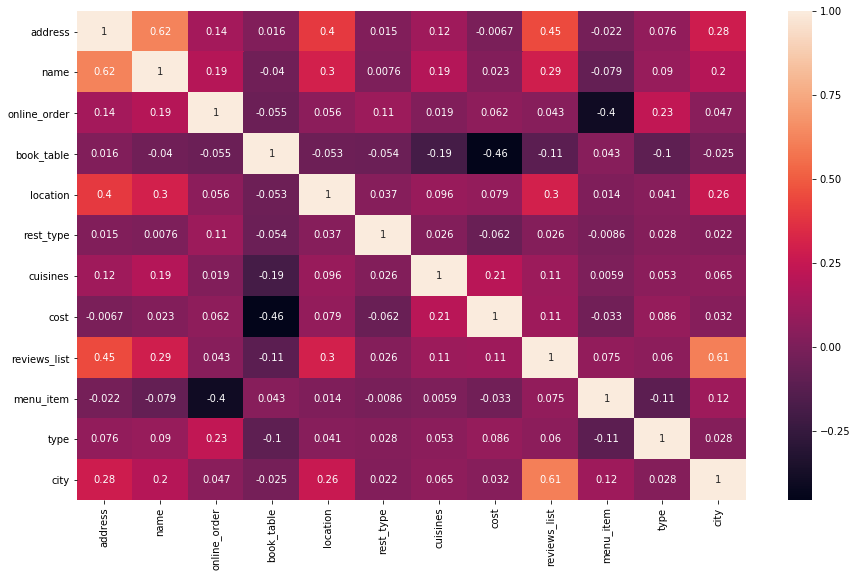

In [26]:
#corelation b/w datasets
corr=zomato_en.corr(method='kendall')
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
zomato_en.columns

# ## The highest corelation is between name and address which is 0.62

# Data Visualization

Text(0.5, 1.0, 'Deliver online or not')

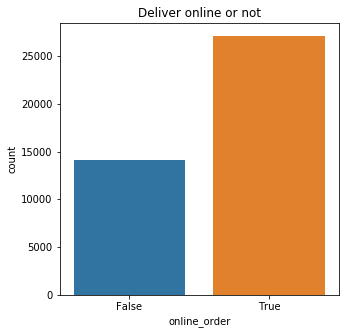

In [27]:
#restaurent deliver online or not
sns.countplot(zomato['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Deliver online or not")

Text(0.5, 1.0, 'Book table?')

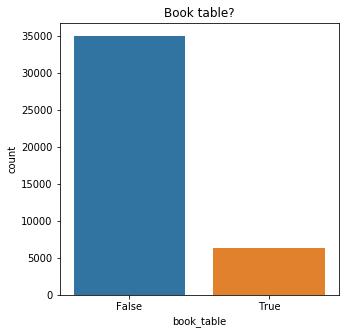

In [28]:
#allow table booking or not
sns.countplot(zomato['book_table'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Book table?")

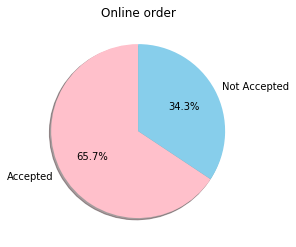

In [29]:
#accept online order or not
labels = ["Accepted",'Not Accepted']
values = zomato['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online order')
plt.show()

In [30]:
from bokeh.io import output_notebook, show, reset_output
import bokeh
from bokeh.plotting import figure
output_notebook()
from bokeh.models import HoverTool

a= zomato_en['online_order']
b= zomato_en['book_table']

line_plot = figure(plot_width=800, plot_height=400, title='Book Table Vs Online Order', x_axis_label='Online Order', y_axis_label='Book Table')
line_plot.line(a, b, line_width=3)

line_plot.add_tools(HoverTool())
show(line_plot)

Loading BokehJS ...

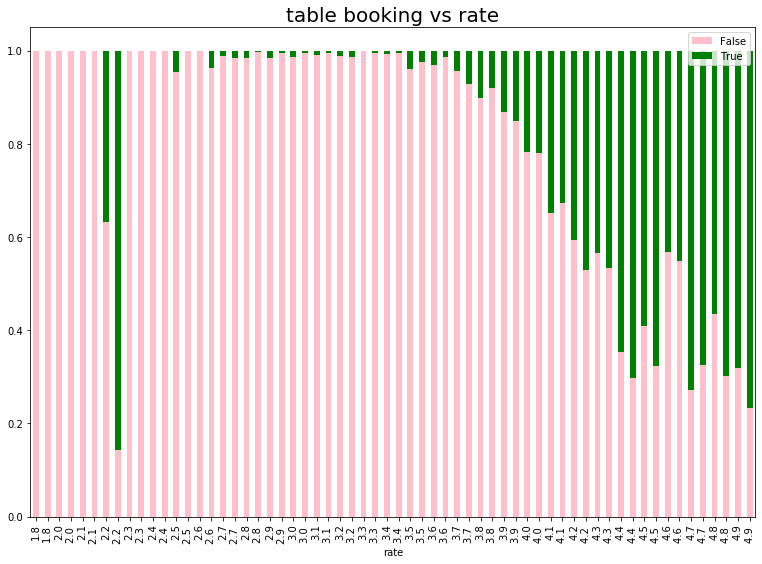

In [31]:
#table bookin vs rate
plt.rcParams['figure.figsize']=(13, 9)
Y=pd.crosstab(zomato['rate'],zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis=0). plot(kind= 'bar', stacked=True, color=['pink', 'green'])
plt.title("table booking vs rate", fontweight=30, fontsize=20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Location')

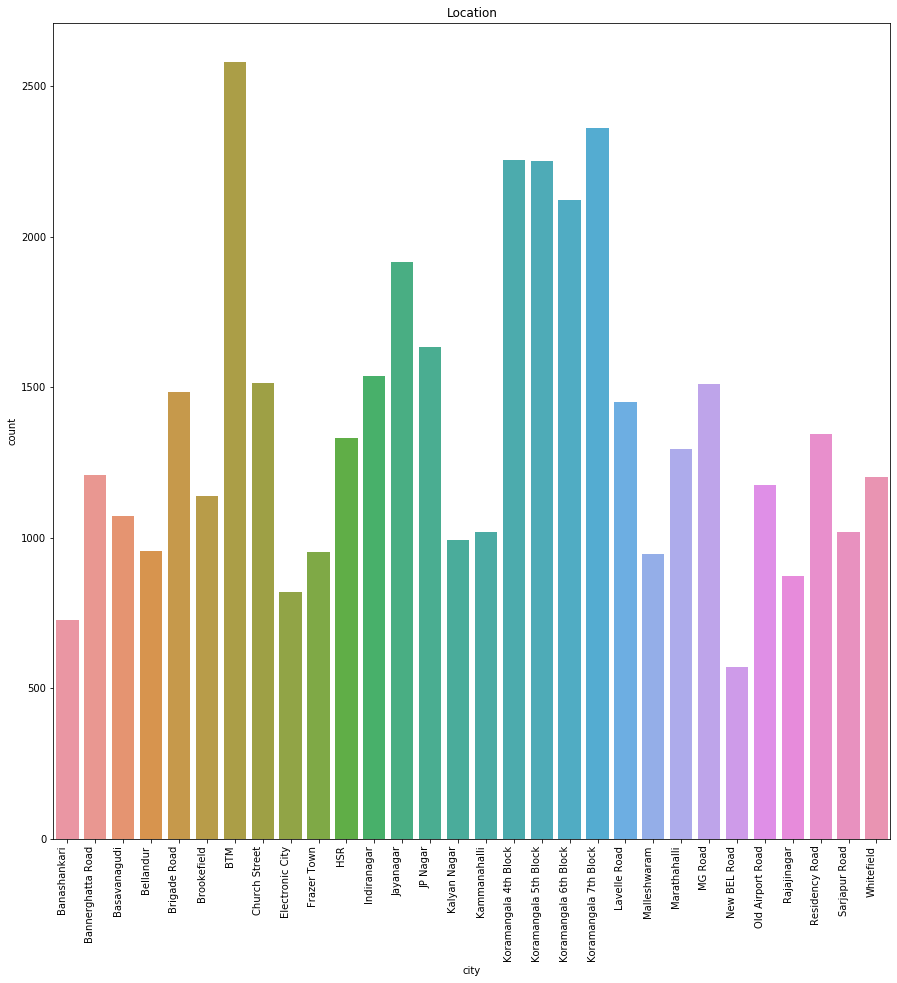

In [32]:
#Location vs no of restaurent
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha='right')
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title("Location")

<Figure size 2240x1280 with 0 Axes>

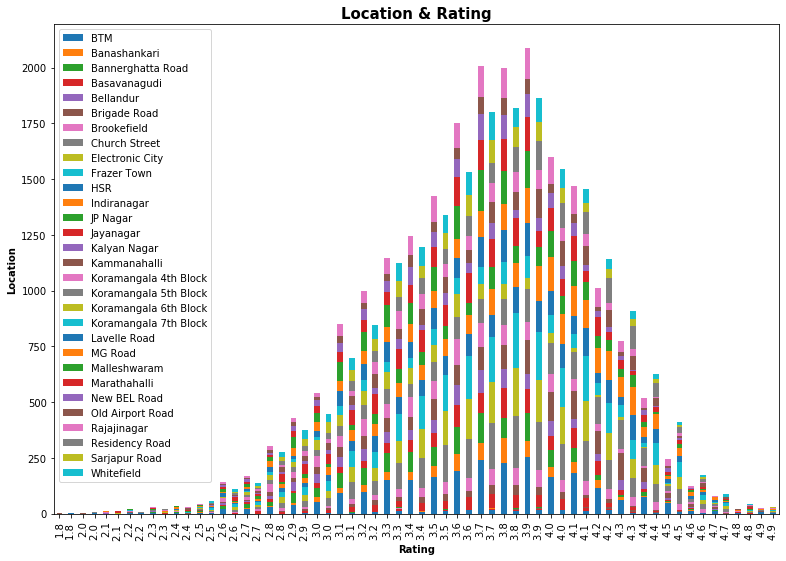

In [33]:
#location and rating
from matplotlib.pyplot import figure
figure(figsize=(28, 16), dpi=80)

loc_plt=pd.crosstab(zomato['rate'], zomato['city'])
loc_plt.plot(kind='bar', stacked=True)
plt.title('Location & Rating', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

plt.legend()

In [34]:
zomato.head()

,address,name,online_order,book_table,rate,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Text(0.5, 1.0, 'Type of Service')

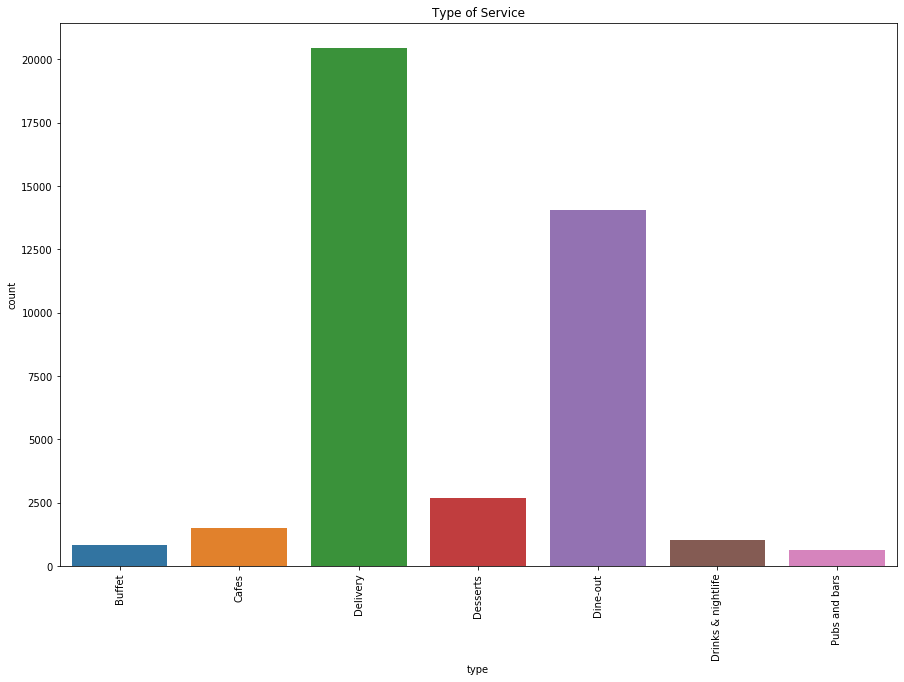

In [35]:
#type of service
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Type of Service")

Text(0.5, 0, 'Rating')

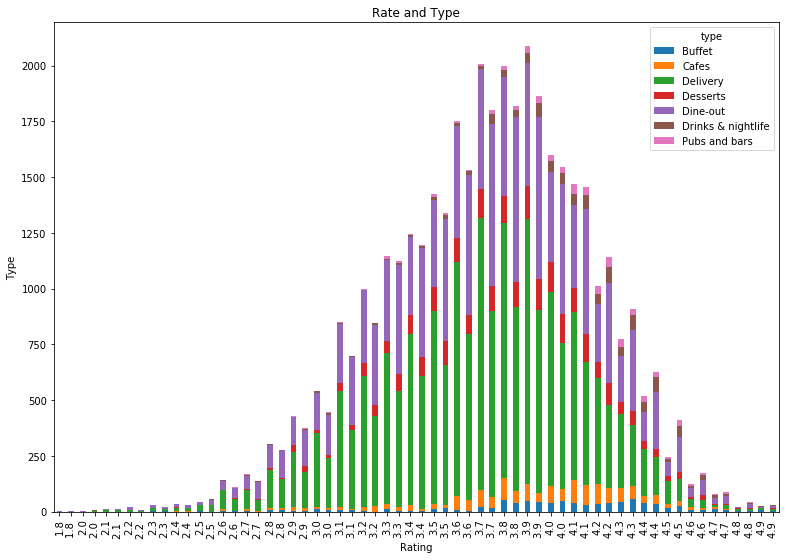

In [36]:
type_plt=pd.crosstab(zomato['rate'], zomato['type'])
type_plt.plot(kind='bar', stacked=True)
plt.title('Rate and Type')
plt.ylabel('Type')
plt.xlabel('Rating')

Text(0.5, 1.0, 'No of restaurent at Locations')

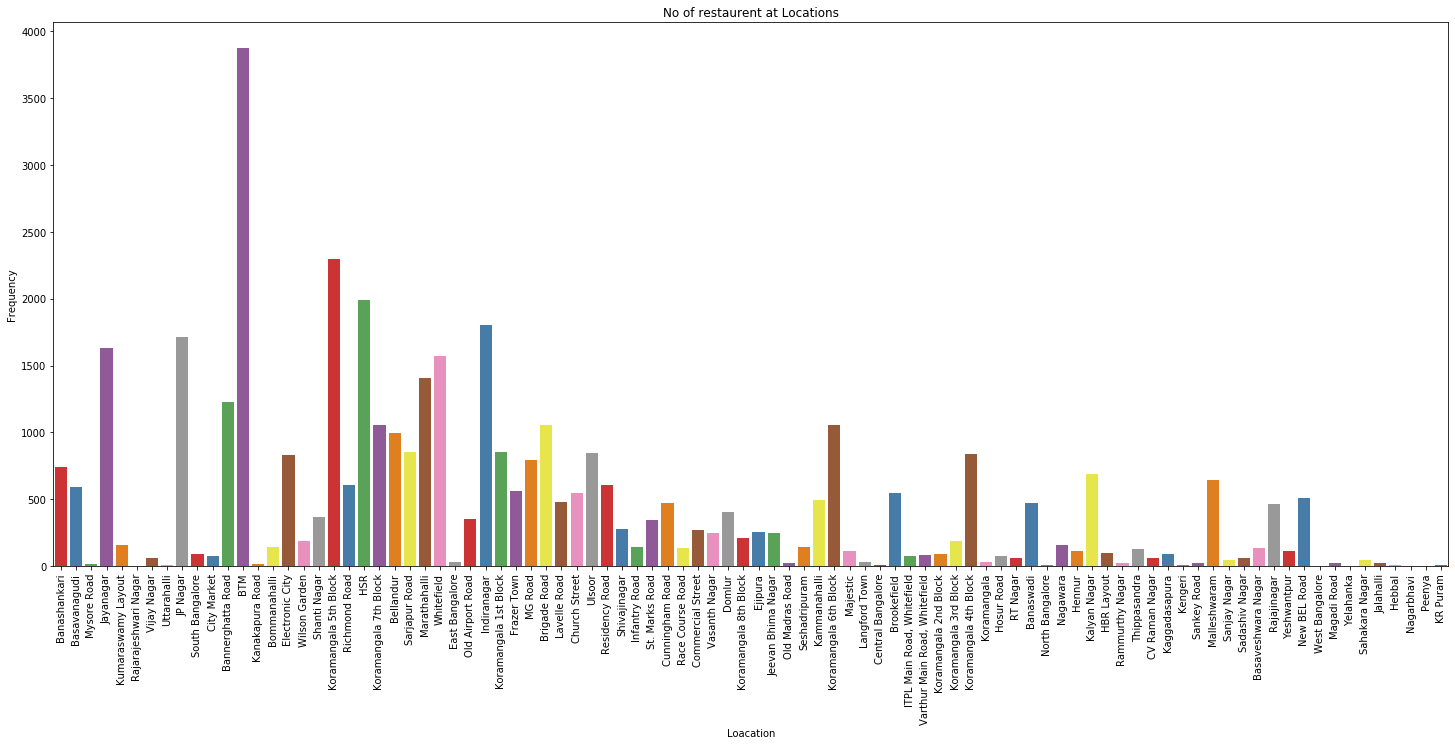

In [37]:
#No restaurent at location
fig=plt.figure(figsize=(25,10))
loc= sns.countplot(x='location', data=zomato, palette='Set1')
loc.set_xticklabels(loc.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Loacation')
loc
plt.title('No of restaurent at Locations')

Text(0.5, 1.0, 'Restaurent Types')

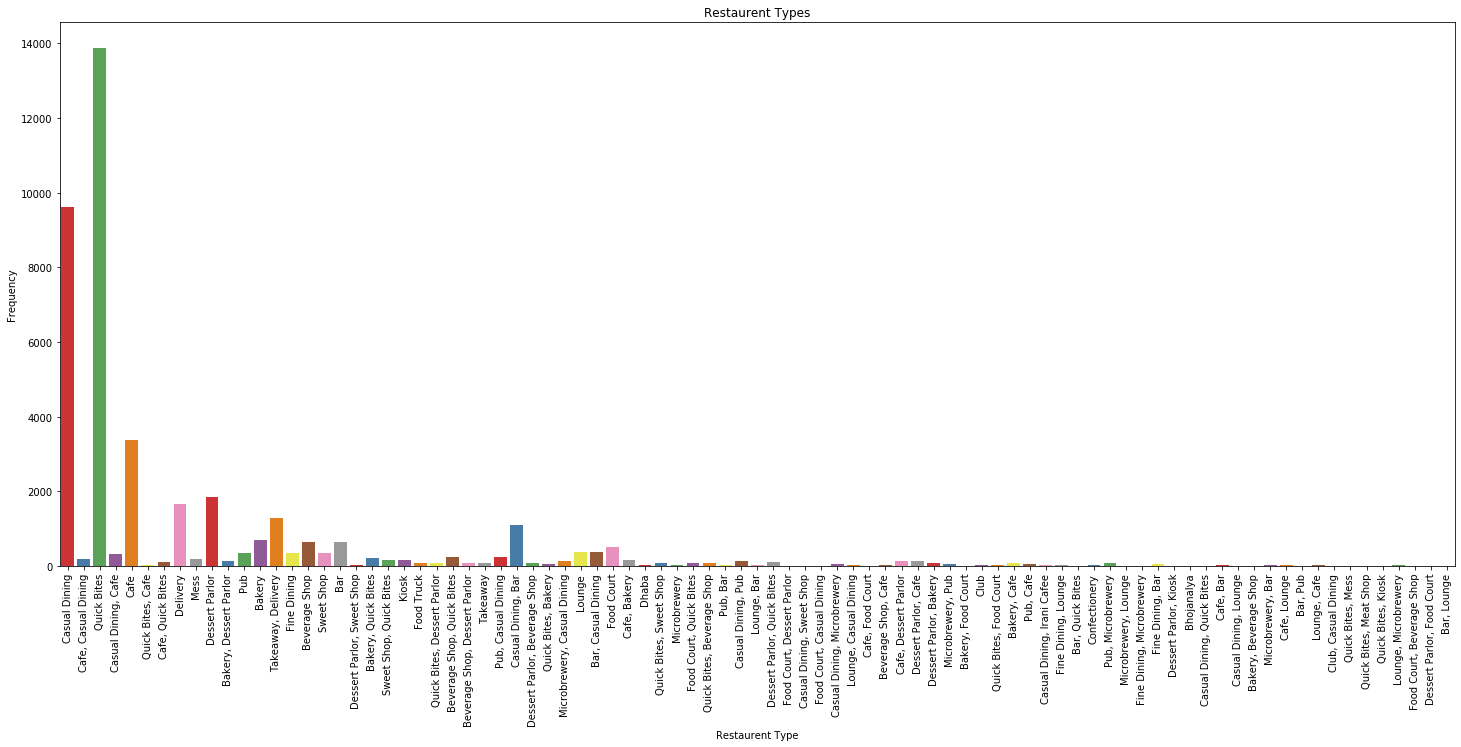

In [38]:
# restaurent type and its frequency
fig=plt.figure(figsize=(25,10))
loc= sns.countplot(x='rest_type', data=zomato, palette='Set1')
loc.set_xticklabels(loc.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Restaurent Type')
loc
plt.title('Restaurent Types')

Text(0.5, 0, 'No of outlet')

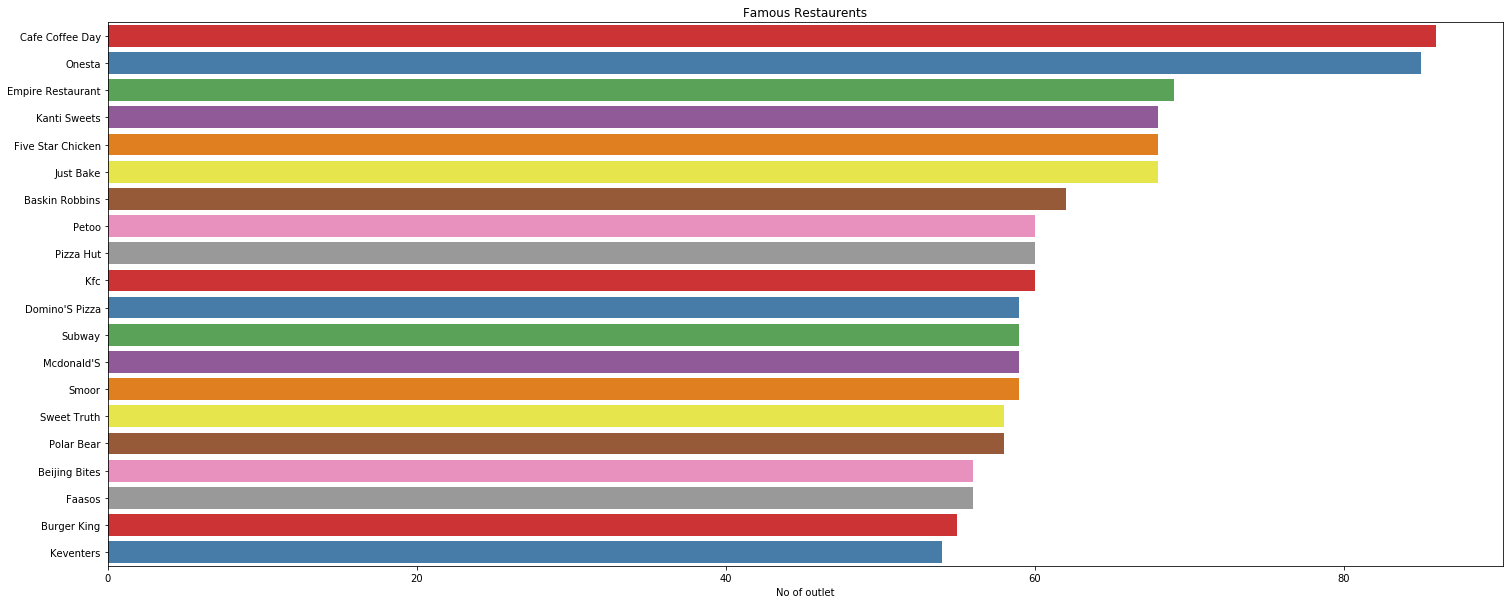

In [39]:
#List of famous restaurent
fig=plt.figure(figsize=(25,10))
res_name=zomato['name'].value_counts()[:20]
sns.barplot(x=res_name, y=res_name.index, palette='Set1')

plt.title('Famous Restaurents')
plt.xlabel('No of outlet')

# Models

In [40]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

x =zomato_en.iloc[:,[2,3,5,7,9,11]]
y=zomato_en['rate']

#train_test_split
x_train, x_test, y_train, y_test =train_test_split( x,y,test_size=0.1, random_state=353)
x_train.head()

,online_order,book_table,location,cuisines,reviews_list,type
21375,0,1,8,5,9797,4
910,0,1,8,278,582,1
8438,0,1,45,1295,4668,2
11871,0,1,16,537,1437,2
31789,0,1,12,1860,5458,4


In [41]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.19150209313479394

In [42]:
#Lasso regression
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000, normalize=True)
lassocv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [43]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
r2_score(y_test, lasso.predict(x_test))

0.19150228908509592

In [44]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(min_samples_leaf=0.0001)
dtree.fit(x_train, y_train)
y_predict=dtree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.5791914046821118

In [45]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rforest= RandomForestRegressor(n_estimators=500, random_state=329, min_samples_leaf=0.0001)
rforest.fit(x_train, y_train)
y_predict=rforest.predict(x_test)
r2_score(y_test, y_predict)

0.6774966786372216

In [46]:
#extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(n_estimators=100)
etree.fit(x_train, y_train)

y_predict=etree.predict(x_test)
r2_score(y_test, y_predict)

0.6640609281737979

In [58]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)
r2_score(y_test, y_predict)

0.3137887260978809

In [59]:
#XGBRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)

y_predict=xgb.predict(x_test)
r2_score(y_test,y_predict)

C:\Users\AB\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


TypeError: must be real number, not str

In [73]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), dtree.score(x_test, y_test), rforest.score(x_test, y_test), etree.score(x_test, y_test),
               gbr.score(x_test, y_test)]
})


#models.sort_values(by = 'Score', ascending = False)
print(models)

                  Model     Score
0     Linear Regression  0.191502
1      Lasso Regression  0.191502
2         Decision Tree  0.579191
3         Random Forest  0.677497
4  Extra Tree Regressor  0.664061
5        Gradient Boost  0.313789
